As bibliotecas abaixo foram usadas, descomente as linhas para instalar, caso não tenha.

In [41]:
using LinearAlgebra
import Pkg;
#Pkg.add("Plots")
#Pkg.add("FileIO")
#Pkg.add("ImageMagick")
#Pkg.add("ImageIO")
#Pkg.add("Images")
#Pkg.add("CSV")
#Pkg.add("DataFrames")
using Plots
using Images
using CSV
using DataFrames
using Statistics

### 1. Dado uma tabela usuários por filmes (matriz):




| Ratings Matrix | Titanic | Rocky | The Robbit | Fight Club | Jurassic Park |
|----------------|---------|-------|------------|------------|---------------|
| User A         | 0.82    | 0.18  | 0.5        | 0.1        | 0.26          |
| User B         | 0.74    | 0.26  | 0.5        | 0.2        | 0.32          |
| User C         | 0.34    | 0.69  | 0.5        | 0.7        | 0.62          |
| User D         | 0.58    | 0.42  | 0.5        | 0.4        | 0.44          |
| User E         | 0.1     | 0.9   | 0.5        | 1.0        | 0.8           |



**(a)** Calcule o SVD com 2 componentes para a transposta dessa matriz
(filmes por usuários).

In [2]:
# matriz de dados: usuários por filmes
usuariosPorFilmes = [0.82 0.18 0.5 0.1 0.26; 
                     0.74 0.26 0.5 0.2 0.32; 
                     0.34 0.69 0.5 0.7 0.62; 
                     0.58 0.42 0.5 0.4 0.44;
                     0.1  0.9  0.5 1.0 0.8
                    ]

# matriz transposta: filmes por usuários
filmesPorUsuarios = usuariosPorFilmes'

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 0.82  0.74  0.34  0.58  0.1
 0.18  0.26  0.69  0.42  0.9
 0.5   0.5   0.5   0.5   0.5
 0.1   0.2   0.7   0.4   1.0
 0.26  0.32  0.62  0.44  0.8

In [3]:
# calculando o svd
U, S, V = svd(filmesPorUsuarios)

SVD{Float64, Float64, Adjoint{Float64, Matrix{Float64}}}
U factor:
5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.383909  -0.801181  -0.0648164   0.45255       0.0414801
 -0.476548   0.295342  -0.828055   -8.32667e-16  -1.0339e-15
 -0.427213  -0.255515   0.154728   -0.815621      0.251044
 -0.481342   0.426567   0.429157    0.360492      0.521747
 -0.45969    0.153734   0.319385    0.00257947   -0.814271
singular values:
5-element Vector{Float64}:
 2.5378138113655755
 1.0684389758115322
 0.020957428490506358
 7.281840454388381e-17
 1.8116516982185542e-17
Vt factor:
5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.308078    -0.340833  -0.510243     -0.406344  -0.602875
 -0.607369    -0.476709   0.184886     -0.215388   0.568575
  0.0534577    0.102117  -0.839922      0.199437   0.491396
  0.730288    -0.544783  -7.21645e-16  -0.369055   0.18355
 -0.00364077   0.591072  -6.85758e-16  -0.782634   0.195204

O Julia nos dá um SVD com 5 componentes, mas queremos um com apenas dois componentes. Para isso, podemos pegar as duas primeiras colunas da matriz $U$, criar uma matriz diagonal com os dois primeiros valores singulares da matriz $S$ e pegar as duas primeras linhas da matriz $V'$

In [4]:
# pegando as primeiras duas colunas de U
U = U[:,1:2]

5×2 Matrix{Float64}:
 -0.383909  -0.801181
 -0.476548   0.295342
 -0.427213  -0.255515
 -0.481342   0.426567
 -0.45969    0.153734

In [5]:
# pegando os dois primeiros valores singulares de S
S = Diagonal(S[1:2])

2×2 Diagonal{Float64, Vector{Float64}}:
 2.53781   ⋅ 
  ⋅       1.06844

In [6]:
# pegando as duas primeiras colunas de V para obter as duas primeiras linhas de V'
V = V[:,1:2]
V'

2×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.308078  -0.340833  -0.510243  -0.406344  -0.602875
 -0.607369  -0.476709   0.184886  -0.215388   0.568575

Dessa forma, obtemos a melhor aproximação de rank 2 para a matriz filmesPorUsuarios:

In [7]:
U*S*V'

5×5 Matrix{Float64}:
 0.820073   0.740139  0.338859  0.580271  0.100668
 0.180928   0.261772  0.675424  0.423461  0.908528
 0.499827   0.499669  0.502724  0.499353  0.498407
 0.0995192  0.199082  0.707554  0.398206  0.99558
 0.259642   0.319316  0.625622  0.438665  0.796711

**(b)** Desenhe os filmes em dimensão dois baseado no resultado da questão anterior.

Tendo o SVD com 2 componentes em mãos, podemos tratar a matriz $V'$ como uma base ortonormal, ou seja, a matriz que reduz os nossos dados para dimensão 2, e a matriz $US$ como a matriz de coordenadas desses vetores em relação a base ortonormal.

Obtendo as coordenadas de cada filme:

In [8]:
Coordenadas = U*S

titanic = Coordenadas[1,:]
rocky = Coordenadas[2,:]
theHobbit = Coordenadas[3,:]
fightClub = Coordenadas[4,:]
jurassicPark = Coordenadas[5,:]

Coordenadas

5×2 Matrix{Float64}:
 -0.974289  -0.856013
 -1.20939    0.315555
 -1.08419   -0.273002
 -1.22156    0.455761
 -1.16661    0.164256

Plotando os pontos correspondentes a cada filme:

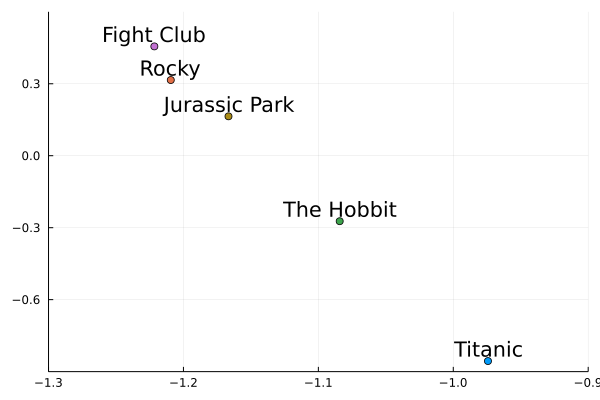

In [9]:
scatter([titanic[1]],[titanic[2]], xlims = (-1.3,-0.9), ylims=(-0.9, 0.6), legend=false, annotate=(titanic[1],titanic[2]+0.05,"Titanic"))
scatter!([rocky[1]],[rocky[2]], annotate=(rocky[1],rocky[2]+0.05,"Rocky"))
scatter!([theHobbit[1]],[theHobbit[2]], annotate=(theHobbit[1],theHobbit[2]+0.05,"The Hobbit"))
scatter!([fightClub[1]],[fightClub[2]], annotate=(fightClub[1],fightClub[2]+0.05,"Fight Club"))
scatter!([jurassicPark[1]],[jurassicPark[2]], annotate=(jurassicPark[1],jurassicPark[2]+0.05,"Jurassic Park"))

**(c)** Qual filme você recomendaria para quem gostou de Titanic usando
os itens anteriores?

Usando o critério de que filmes parecidos ficarão mais próximos no gráfico, isto é, terão a menor distância euclidiana, podemos recomendar o filme The Hobbit. É possível confirmar isso numericamente, através dos cálculos:

In [10]:
println("Distância do Titanic para Rocky: $(sqrt(norm(titanic-rocky)))")
println("Distância do Titanic para Fight Club: $(sqrt(norm(titanic-fightClub)))")
println("Distância do Titanic para The Hobbit: $(sqrt(norm(titanic-theHobbit)))")
println("Distância do Titanic para Jurassic Park: $(sqrt(norm(titanic-jurassicPark)))")

Distância do Titanic para Rocky: 1.0931259421463007
Distância do Titanic para Fight Club: 1.155368159928468
Distância do Titanic para The Hobbit: 0.7702454399523118
Distância do Titanic para Jurassic Park: 1.018938941297676


Com isso, vemos que a distância para o The Hobbit é a menor.

### 2. Considere a seguinte imagem:

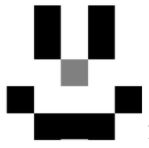

Insira esta imagem em uma matriz 5 × 5. Suponha que as sombras que você vê são apenas 0, 0.5 e 1 como fizemos na lista anterior.
Faça o SVD com 1, 2, 3, 4 e 5 componentes e calcule o erro para cada caso. Discuta o que está acontecendo.

In [11]:
# modelando a imagem como uma matriz
imagem = [0.0 1.0 0.0 1.0 0.0;
          0.0 1.0 0.0 1.0 0.0;
          0.0 0.0 0.5 0.0 0.0;
          1.0 0.0 0.0 0.0 1.0;
          0.0 1.0 1.0 1.0 0.0]

5×5 Matrix{Float64}:
 0.0  1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0  0.0
 0.0  0.0  0.5  0.0  0.0
 1.0  0.0  0.0  0.0  1.0
 0.0  1.0  1.0  1.0  0.0

Função para fazer o SVD com k componentes:

In [12]:
function svdk(A, k)
    U, S, V = svd(A)
    
    return U[:,1:k], Diagonal(S[1:k]), V[:,1:k]
end

svdk (generic function with 1 method)

Função para calcular o Erro

In [13]:
function erro(A, B)
    return norm(A - B)
end

erro (generic function with 1 method)

Comparação dos erros:

In [14]:
# SVD com 1 componente
U, S, V = svdk(imagem, 1)
erro1 = erro(imagem, U*S*V')
println("Erro do SVD com 1 componente:  $(erro1)")

# SVD com 2 componentes
U, S, V = svdk(imagem, 2)
erro2 = erro(imagem, U*S*V')
println("Erro do SVD com 2 componentes: $(erro2)")

# SVD com 3 componentes
U, S, V = svdk(imagem, 3)
erro3 = erro(imagem, U*S*V')
println("Erro do SVD com 3 componentes: $(erro3)")

# SVD com 4 componentes
U, S, V = svdk(imagem, 4)
erro4 = erro(imagem, U*S*V')
println("Erro do SVD com 4 componentes: $(erro4)")

# SVD com 5 componentes
U, S, V = svdk(imagem, 5)
erro5 = erro(imagem, U*S*V')
println("Erro do SVD com 5 componentes: $(erro5)")

Erro do SVD com 1 componente:  1.6913994062796056
Erro do SVD com 2 componentes: 0.927810299340874
Erro do SVD com 3 componentes: 4.2776576904628646e-16
Erro do SVD com 4 componentes: 4.279051708983312e-16
Erro do SVD com 5 componentes: 4.279051708983312e-16


Gráfico com os erros

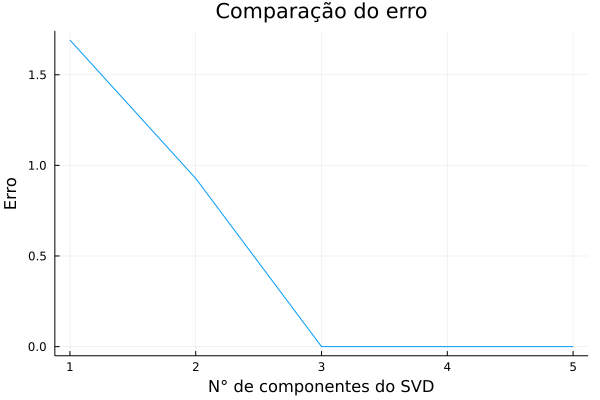

In [15]:
plot([erro1, erro2, erro3, erro4, erro5], xlabel="N° de componentes do SVD", ylabel="Erro", title="Comparação do erro", legend=false)

Podemos perceber que o erro zera quando o SVD tem três componentes ou mais. Isso ocorre pois a matriz que representa a imagem possui a penúltima coluna idêntica à segunda e a última idêntica à primeira, enquanto as três primeiras colunas são diferentes e LI. Logo, a matriz tem posto 3 e calcular o SVD com mais componentes não tratá nenhum ganho para a redução da imagem.

### 3. Encontre (ou desenhe) uma imagem A na internet, com mais ou menos 200 × 200 pixels (pode ser um pouco maior), que

**(a)** exija mais que 3 componentes e menos que 6 no SVD para recuperar pelo menos 99% de sua norma total.

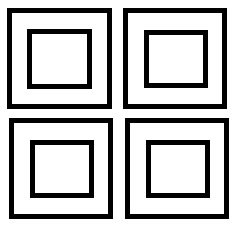

In [16]:
image = Gray.(load("svd200_a.jpg")) # converte para grayscale
imageMatrix = Float64.(image)       # fornece a matriz numérica
image

Calculando o SVD da imagem

In [17]:
U, S, V = svdk(imageMatrix, 5)

([-0.0750651538975673 -0.04481065281990834 … 0.10000382972459668 0.07720207264733016; -0.07506515389756635 -0.04481065281990926 … 0.10000382972459643 0.07720207264732892; … ; -0.07506515389756639 -0.04481065281991051 … 0.10000382972459554 0.07720207264732845; -0.07506515389756639 -0.04481065281991049 … 0.10000382972459558 0.07720207264732838], [197.95229482936537 0.0 … 0.0 0.0; 0.0 32.05311492788059 … 0.0 0.0; … ; 0.0 0.0 … 28.445383041663924 0.0; 0.0 0.0 … 0.0 17.52444333690902], [-0.07385510569503123 0.11348362186239301 … 0.03871069085921705 0.09009186903067264; -0.0738487780474042 0.11348633684105566 … 0.03864430530974606 0.08996174921515138; … ; -0.07385880829011382 0.11351120301058706 … 0.03876087420902492 0.09024965907791464; -0.07385880829011383 0.11351120301058705 … 0.03876087420902492 0.09024965907791464])

Norma da imagem reduzida em relação à norma da imagem original. Podemos ver que, usando 5 componentes, a norma obtida é 99,3% da norma original

In [18]:
norm(U*S*V')/norm(imageMatrix)

0.9934804440289647

Mostrando a imagem comprimida usando 5 componentes

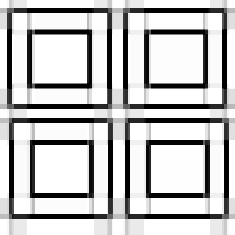

In [19]:
Gray.(U*S*V')

**(b)** exija mais que 40 componentes para recuperar pelo menos 99% de sua norma total.

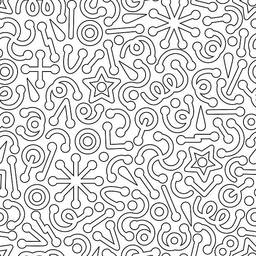

In [20]:
image = Gray.(load("svd200_b.jpg")) # converte para grayscale
imageMatrix = Float64.(image)       # fornece a matriz numérica
image

Calculando o SVD da imagem

In [21]:
U, S, V = svdk(imageMatrix, 64)

([-0.06054404173526462 0.09041173651740464 … -0.10038332091440509 -0.011876935964965803; -0.06129767073283915 0.0015132839650622565 … 0.019299704165281664 -0.04128806614580741; … ; -0.06251617432267123 0.07144234522408349 … 0.03627287972331576 -0.06902953746394622; -0.06364002210388602 0.10417360504877449 … 0.007933108519966791 -0.04034091790144986], [213.25720780706067 0.0 … 0.0 0.0; 0.0 9.200423939098597 … 0.0 0.0; … ; 0.0 0.0 … 4.729389337456068 0.0; 0.0 0.0 … 0.0 4.588514723463513], [-0.060489951890079906 0.03708506736846517 … 0.029894182050040387 -0.04200561437311612; -0.06151711694844231 0.038198739263079685 … -0.011279968765729089 0.07052118992658885; … ; -0.06163735762208416 0.19046744426285328 … -0.08053509601374396 -0.013473241226258193; -0.06341373151639178 0.09902948980534441 … -0.04150590582176116 -0.038087462386441014])

Norma da imagem reduzida em relação à norma da imagem original. Podemos ver que, usando 64 componentes, a norma obtida é 99,0% da norma original

In [22]:
norm(U*S*V')/norm(imageMatrix)

0.990071404255747

Mostrando a imagem comprimida usando 64 componentes

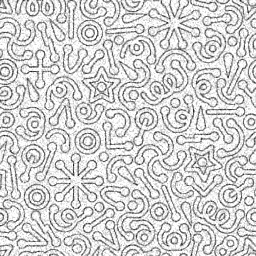

In [23]:
Gray.(U*S*V')

### 4. Abaixo vemos uma redução de dimensionalidade realizada para o dataset de vinhos, onde o eixo x representa cada componente e o eixo y a norma individual daquele componente. Responda:

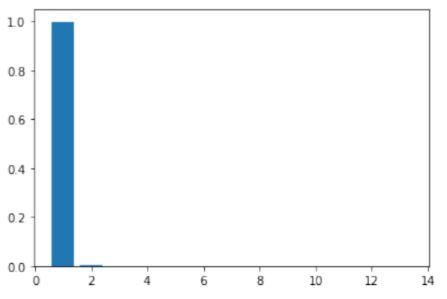

**(a)** A redução de dimensionalidade foi realizada com o Colab https://colab.research.google.com/drive/1C5mQnsMfIaMIEsKqw0Q78ML4IPmcTslv.

De acordo com o código e o resultado apresentado, podemos considerar essa redução incorreta. Justifique. Qual foi o provável erro cometido?

A redução de dimensionalidade utilizada é sensível à escala dos dados. A tabela de vinhos apresentada tem colunas com escalas muito diferentes entre si, o algoritmo não vai dar importância para os números pequenos. Como a última coluna tem números muito maiores em comparação as outras colunas, uma componente que representa essa coluna se destacará e as outras serão praticamente um ruído.

**(b)** Utilize o dataset de vinhos e faça a redução de dimensionalidade correta. Quantas componentes são necessárias para que atinjamos 80% da norma total do dataset?

Lendo o dataset

In [53]:
dataset = CSV.read(download("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv"), DataFrame)
dataset

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols
,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28
2,1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26
3,1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3
4,1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24
5,1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39
6,1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34
7,1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3
8,1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31
9,1,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29


Eliminando a coluna "Wine"

In [54]:
select!(dataset, Not("Wine"))

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols
,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3
4,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24
5,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39
6,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34
7,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3
8,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31
9,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29


In [102]:
# transformando o dataframe em matriz para facilitar a operação
Dados = Matrix(dataset)
m, n = size(Dados)

Dados

178×13 Matrix{Float64}:
 14.23  1.71  2.43  15.6  127.0  2.8   …  2.29   5.64  1.04  3.92  1065.0
 13.2   1.78  2.14  11.2  100.0  2.65     1.28   4.38  1.05  3.4   1050.0
 13.16  2.36  2.67  18.6  101.0  2.8      2.81   5.68  1.03  3.17  1185.0
 14.37  1.95  2.5   16.8  113.0  3.85     2.18   7.8   0.86  3.45  1480.0
 13.24  2.59  2.87  21.0  118.0  2.8      1.82   4.32  1.04  2.93   735.0
 14.2   1.76  2.45  15.2  112.0  3.27  …  1.97   6.75  1.05  2.85  1450.0
 14.39  1.87  2.45  14.6   96.0  2.5      1.98   5.25  1.02  3.58  1290.0
 14.06  2.15  2.61  17.6  121.0  2.6      1.25   5.05  1.06  3.58  1295.0
 14.83  1.64  2.17  14.0   97.0  2.8      1.98   5.2   1.08  2.85  1045.0
 13.86  1.35  2.27  16.0   98.0  2.98     1.85   7.22  1.01  3.55  1045.0
 14.1   2.16  2.3   18.0  105.0  2.95  …  2.38   5.75  1.25  3.17  1510.0
 14.12  1.48  2.32  16.8   95.0  2.2      1.57   5.0   1.17  2.82  1280.0
 13.75  1.73  2.41  16.0   89.0  2.6      1.81   5.6   1.15  2.9   1320.0
  ⋮           

Média das linhas e desvio padrão de cada coluna

In [120]:
function mediaLinhas(matriz)
    m, n = size(matriz)
    media = zeros(n,1)
    
    for i=1:m
        media = media + matriz[i,:]
    end
    
    media = media / m
    
    return media
end

function desvioPadraoColunas(matriz)
    m, n = size(matriz)
    desvio = zeros(n,1)
    
    for i=1:n
        desvio[i] = std(matriz[:,i])
    end
    
    return desvio
end

media = mediaLinhas(Dados)
desvio = desvioPadraoColunas(Dados)

desvio

13×1 Matrix{Float64}:
   0.8118265380058575
   1.1171460976144627
   0.27434400906081485
   3.339563767173505
  14.282483515295665
   0.6258510488339892
   0.9988586850169469
   0.12445334029667937
   0.5723588626747612
   2.318285871822413
   0.2285715658298234
   0.7099904287650503
 314.9074742768491

In [119]:
media

13×1 Matrix{Float64}:
  13.000617977528083
   2.336348314606741
   2.3665168539325854
  19.49494382022472
  99.74157303370787
   2.295112359550562
   2.0292696629213474
   0.36185393258426973
   1.5908988764044953
   5.058089882022473
   0.9574494382022468
   2.6116853932584254
 746.8932584269663

Normalizando os dados para aplicação do SVD

In [122]:
# normalizando as linhas
DadosNormalizados = zeros(m,n)

for i=1:m
    DadosNormalizados[i,:] = (Dados[i,:] - media) .* (1 ./ desvio)
end

DadosNormalizados

178×13 Matrix{Float64}:
  1.51434   -0.560668    0.2314     …   0.361158   1.84272    1.01016
  0.245597  -0.498009   -0.825667       0.404908   1.11032    0.962526
  0.196325   0.0211715   1.10621        0.317409   0.786369   1.39122
  1.68679   -0.345835    0.486554      -0.426341   1.18074    2.32801
  0.294868   0.227053    1.83523        0.361158   0.448336  -0.0377675
  1.47739   -0.515911    0.304301   …   0.404908   0.335659   2.23274
  1.71143   -0.417446    0.304301       0.273659   1.36384    1.72465
  1.30494   -0.166807    0.88751        0.448658   1.36384    1.74053
  2.25341   -0.623328   -0.716315       0.536158   0.335659   0.946649
  1.05858   -0.882918   -0.35181        0.229909   1.32159    0.946649
  1.35421   -0.157856   -0.242458   …   1.27991    0.786369   2.42327
  1.37884   -0.76655    -0.169557       0.929908   0.293405   1.6929
  0.923081  -0.542765    0.158499       0.842408   0.406082   1.81992
  ⋮                                 ⋱   ⋮                    


Obtendo a porcentagem de norma restaurada para cada número de componentes do SVD

In [123]:
numeroDeComponentes = 7

normaRestaurada = zeros(numeroDeComponentes)

for i=1:numeroDeComponentes 
    U, S, V = svdk(DadosNormalizados, i)
    normaRestaurada[i] = norm(U*S*V')/norm(DadosNormalizados)*100
end

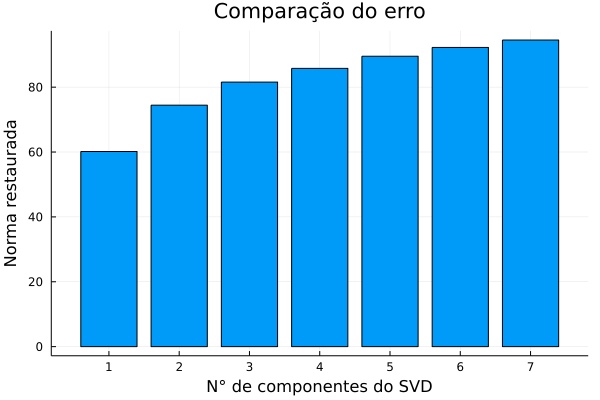

In [126]:
bar(normaRestaurada, xlabel="N° de componentes do SVD", ylabel="Norma restaurada", title="Comparação do erro", legend=false)

### 5. Implemente o algoritmo K-means da maneira que apresentamos na aula (parecido com o Alternating Least Squares).

Função para encontrar a melhor matriz Indicadora, dadas as matrizes de Dados e de Centroides

In [30]:
function melhorIndicadora(Dados, Centroides)
    m, n = size(Dados)
    _, qtdCentroides = size(Centroides)
    Indicadora = zeros(qtdCentroides, n)
    
    # para cada vetor na matriz indicadora
    for i=1:n
        menorDistancia = norm(Centroides[:,1] - Dados[:,i])
        centroideMaisProximo = 1
        
        # verifica qual centroide está mais próximo do dado
        for j=2:qtdCentroides
            distancia = norm(Centroides[:,j] - Dados[:,i])
            
            if (distancia < menorDistancia)
                menorDistancia = distancia
                centroideMaisProximo = j
            end
        end
        
        # vetor da matriz indicadora: vetor com um e somente um elemento 1
        indicador = zeros(qtdCentroides, 1)
        indicador[centroideMaisProximo] = 1
        
        Indicadora[:,i] = indicador
    end
    
    return Indicadora    
end

melhorIndicadora (generic function with 1 method)

Função para encontrar a melhor matriz de Centroides, dadas as matrizes de Dados e a Indicadora

In [31]:
function melhoresCentroides(Dados, Indicadora)
    m, n = size(Dados)
    qtdCentroides, _ = size(Indicadora)
    Centroides = zeros(m, qtdCentroides)
    
    # para cada vetor na matriz de centroides
    for i=1:qtdCentroides
        soma = zeros(m,1)
        qtdDePontos = 0
        indicador = zeros(qtdCentroides, 1)
        indicador[i] = 1
        
        # para cada elemento na matriz indicadora
        for j=1:n
            # verifica se o vetor da matriz indicadora se refere ao centroide atual
            if (norm(Indicadora[:,j] - indicador) <= 1e-8)
                soma += Dados[:,j]
                qtdDePontos += 1
            end
        end
        
        if (qtdDePontos != 0)
            Centroides[:,i] = soma / qtdDePontos
        end
    end
    
    return Centroides
end

melhoresCentroides (generic function with 1 method)

Função para calcular a distância entre os centroides e os vetores que estão no cluster deles

In [32]:
function erroDistancia(Dados, Centroides, Indicadora)
    m, n = size(Dados)
    qtdCentroides, _ = size(Indicadora)
    erroTotal = 0
    
    # para cada vetor na matriz de centroides
    for i=1:qtdCentroides
        erroDoCentroide = 0
        indicador = zeros(qtdCentroides, 1)
        indicador[i] = 1
        
        # calcula a distância do centroide pro dado
        for j=1:n
            if (norm(Indicadora[:,j] - indicador) <= 1e-8)
                erroDoCentroide += norm(Dados[:,j] - Centroides[:,i])
            end
        end
        
        erroTotal += erroDoCentroide
    end
    
    return erroTotal
end

erroDistancia (generic function with 1 method)

In [33]:
function kmeans(Dados, qtdClusters)
    m, n = size(Dados)
    
    #sorteia b aleatória com pontos dos dados
    Centroides = randn(m, qtdClusters)
    
    # primeira iteração
    Indicadora = melhorIndicadora(Dados, Centroides)
    erro = 0
    novoErro = erroDistancia(Dados, Centroides, Indicadora)
    
    # itera até que a diminuição do erro seja pequena
    while (abs(novoErro - erro) >= 1e-8)
        Centroides = melhoresCentroides(Dados, Indicadora)
        Indicadora = melhorIndicadora(Dados, Centroides)
        
        # atualiza os erros
        erro = novoErro
        novoErro = erroDistancia(Dados, Centroides, Indicadora)
    end
    
    return Centroides, Indicadora
end

kmeans (generic function with 1 method)

### 6. Escolha um dado qualquer (se quiser pode ser um dado sintético) e faça uma redução de dimensionalidade para duas dimensões e depois use o K-means para clusterizar.

Sintetizei uma matriz de dados que possui três clusters bem definidos, cada um com 4 pontos

In [34]:
Dados = [-4.14 -4.26 -3.8 -2.66  -2.94 -2.38 -2.88 -3.0  4.44 4.26 5.0  5.74;
          4.61  4.03  3.77 3.99  -2.15 -2.47 -3.15 -2.67 2.87 2.07 2.0  1.97;
          10.3  10.9  10.6 11.0  -3.0  -3.20 -3.10 -2.9  0.1  0.2  0.15 0.05]

3×12 Matrix{Float64}:
 -4.14  -4.26  -3.8   -2.66  -2.94  -2.38  …  -3.0   4.44  4.26  5.0   5.74
  4.61   4.03   3.77   3.99  -2.15  -2.47     -2.67  2.87  2.07  2.0   1.97
 10.3   10.9   10.6   11.0   -3.0   -3.2      -2.9   0.1   0.2   0.15  0.05

Fazendo a redução de dimensionalidade para duas dimensões

In [35]:
U, S, V = svdk(Dados, 2)

([-0.24517203266784038 -0.9068396671336733; 0.36883583423064253 -0.41427967382306896; 0.8965772703927446 -0.07755107974709491], [24.792652355123217 0.0; 0.0 13.370416224556932], [0.4820013254299512 0.07821078915205082; 0.4962572516309648 0.10084077448260771; … ; -0.014266400353325425 -0.4019613342631494; -0.025646792503344527 -0.45064178254224446])

Teremos que executar o K-Means na matriz de coordenadas dada por $SV'$. Como já sei que os dados estão agrupados em 3 clusters, usarei 3 como parâmetro.

In [36]:
Centroides, Indicadora = kmeans(S*V', 3)

([-3.0107405105698954 12.016417814909031 -0.25788209921785493; 3.8569518098811315 0.8405661474330979 -5.339742640678923], [0.0 0.0 … 0.0 0.0; 1.0 1.0 … 0.0 0.0; 0.0 0.0 … 1.0 1.0])

Matrizes com os resultados:

In [37]:
Centroides

2×3 Matrix{Float64}:
 -3.01074  12.0164    -0.257882
  3.85695   0.840566  -5.33974

In [38]:
Indicadora

3×12 Matrix{Float64}:
 0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0

Plot dos pontos para visualizar os clusters

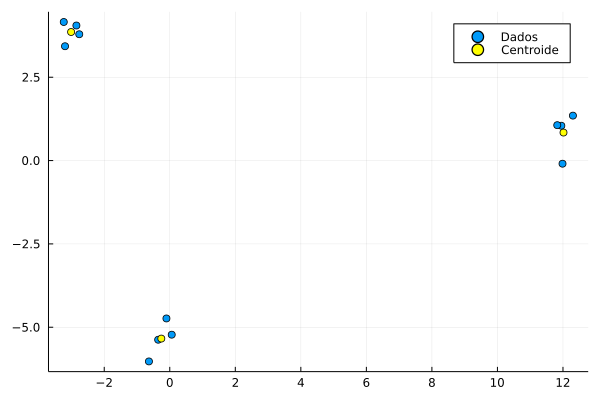

In [39]:
DadosReduzidos = S*V'
scatter([DadosReduzidos[1,:]], [DadosReduzidos[2,:]], label="Dados")
scatter!([Centroides[1,:]], [Centroides[2,:]], color=:yellow, label="Centroide")